# Chapter 14: Association Rules and Collaborative Filtering

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition)
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

Make sure DMBA package is available

In [4]:
pip install dmba

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
%pip install surprise

from pathlib import Path

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

import dmba

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3156240 sha256=523011cb0d11a2a349d4cf4b2d899086d21f7d56db9c42dc64a4f896a0f3575a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
Colab environment detected.


## Table 14.4

In [10]:
# Load and preprocess data set
fp_df = dmba.load_data('Faceplate.csv')
fp_df.set_index('Transaction', inplace=True)
fp_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Red,White,Blue,Orange,Green,Yellow
Transaction,,,,,,
1,1,1,0,0,1,0
2,0,1,0,1,0,0
3,0,1,1,0,0,0
4,1,1,0,1,0,0
5,1,0,1,0,0,0
6,0,1,1,0,0,0
7,1,0,1,0,0,0
8,1,1,1,0,1,0
9,1,1,1,0,0,0


In [11]:
# create frequent itemsets
itemsets = apriori(fp_df, min_support=0.2, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)
rules.sort_values(by=['lift'], ascending=False).head(6)

print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

       antecedents   consequents  support  confidence      lift  leverage  \
12    (Red, White)       (Green)      0.2         0.5  2.500000      0.12   
15         (Green)  (Red, White)      0.2         1.0  2.500000      0.12   
4          (Green)         (Red)      0.2         1.0  1.666667      0.08   
13  (White, Green)         (Red)      0.2         1.0  1.666667      0.08   
7         (Orange)       (White)      0.2         1.0  1.428571      0.06   
8          (Green)       (White)      0.2         1.0  1.428571      0.06   

    zhangs_metric  
12          1.000  
15          0.750  
4           0.500  
13          0.500  
7           0.375  
8           0.375  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
# filter to get rules with single consequents only
rules[[len(c) == 1 for c in rules.consequents]].sort_values(by=['lift'], ascending=False).head(6)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,"(Red, White)",(Green),0.4,0.2,0.2,0.5,2.500000,0.12,1.6,1.000
4,(Green),(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500
13,"(White, Green)",(Red),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500
7,(Orange),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375
8,(Green),(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375
14,"(Red, Green)",(White),0.2,0.7,0.2,1.0,1.428571,0.06,inf,0.375


## Data required for Table 14.5 and 14.6

In [13]:
# Prepare the dataset for table 14.6 based on table 14.5
from itertools import chain
randomTransactions = [{8}, {3,4,8}, {8}, {3,9}, {9}, {1,8}, {6,9}, {3,5,7,9}, {8}, set(),
                      {1,7,9}, {1,4,5,8,9}, {5,7,9}, {6,7,8}, {3,7,9}, {1,4,9}, {6,7,8}, {8}, set(), {9},
                      {2,5,6,8}, {4,6,9}, {4,9}, {8,9}, {6,8}, {1,6,8}, {5,8}, {4,8,9}, {9}, {8},
                      {1,5,8}, {3,6,9}, {7,9}, {7,8,9}, {3,4,6,8}, {1,4,8}, {4,7,8}, {8,9}, {4,5,7,9}, {2,8,9},
                      {2,5,9}, {1,2,7,9}, {5,8}, {1,7,8}, {8}, {2,7,9}, {4,6,9}, {9}, {9}, {6,7,8}]
print(randomTransactions)
uniqueItems = sorted(set(chain.from_iterable(randomTransactions)))
randomData = pd.DataFrame(0, index=range(len(randomTransactions)), columns=uniqueItems)
for row, transaction in enumerate(randomTransactions):
    for item in transaction:
        randomData.loc[row][item] = 1
randomData.head()

[{8}, {8, 3, 4}, {8}, {9, 3}, {9}, {8, 1}, {9, 6}, {9, 3, 5, 7}, {8}, set(), {1, 9, 7}, {1, 4, 5, 8, 9}, {9, 5, 7}, {8, 6, 7}, {9, 3, 7}, {1, 4, 9}, {8, 6, 7}, {8}, set(), {9}, {8, 2, 5, 6}, {9, 4, 6}, {9, 4}, {8, 9}, {8, 6}, {8, 1, 6}, {8, 5}, {8, 9, 4}, {9}, {8}, {8, 1, 5}, {9, 3, 6}, {9, 7}, {8, 9, 7}, {8, 3, 4, 6}, {8, 1, 4}, {8, 4, 7}, {8, 9}, {9, 4, 5, 7}, {8, 9, 2}, {9, 2, 5}, {1, 2, 9, 7}, {8, 5}, {8, 1, 7}, {8}, {9, 2, 7}, {9, 4, 6}, {9}, {9}, {8, 6, 7}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


## Table 14.6

In [14]:
# create frequent itemsets
itemsets = apriori(randomData, min_support=2/len(randomData), use_colnames=True)
# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.7)
print(rules.sort_values(by=['lift'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction'])
      .head(6))

  antecedents consequents  support  confidence      lift  leverage  \
3      (8, 3)         (4)     0.04         1.0  4.545455    0.0312   
1      (1, 5)         (8)     0.04         1.0  1.851852    0.0184   
2      (2, 7)         (9)     0.04         1.0  1.851852    0.0184   
4      (3, 4)         (8)     0.04         1.0  1.851852    0.0184   
5      (3, 7)         (9)     0.04         1.0  1.851852    0.0184   
6      (4, 5)         (9)     0.04         1.0  1.851852    0.0184   

   zhangs_metric  
3       0.812500  
1       0.479167  
2       0.479167  
4       0.479167  
5       0.479167  
6       0.479167  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Table 14.8

In [15]:
# load dataset
all_books_df = dmba.load_data('CharlesBookClub.csv')

# create the binary incidence matrix
ignore = ['Seq#', 'ID#', 'Gender', 'M', 'R', 'F', 'FirstPurch', 'Related Purchase',
          'Mcode', 'Rcode', 'Fcode', 'Yes_Florence', 'No_Florence']
count_books = all_books_df.drop(columns=ignore)
count_books[count_books > 0] = 1

count_books.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,1,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


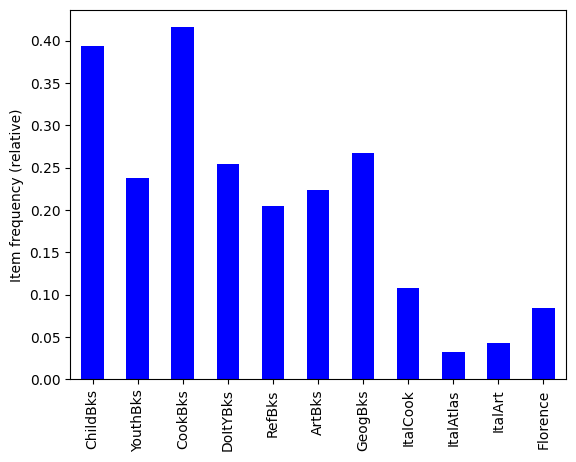

In [16]:
# determine item frequencies
itemFrequency = count_books.sum(axis=0) / len(count_books)

# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
plt.show()

In [17]:
# create frequent itemsets and rules
itemsets = apriori(count_books, min_support=200/4000, use_colnames=True)
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5)

print('Number of rules', len(rules))

# Display 25 rules with highest lift
rules.sort_values(by=['lift'], ascending=False).head(25)

pd.set_option('display.precision', 5)
pd.set_option('display.width', 100)
print(rules.sort_values(by=['lift'], ascending=False).drop(columns=['antecedent support', 'consequent support', 'conviction']).head(25))
pd.reset_option('display.precision')

Number of rules 81
                      antecedents          consequents  support  confidence     lift  leverage  \
64             (YouthBks, RefBks)  (ChildBks, CookBks)  0.05525     0.68000  2.80992   0.03559   
73             (DoItYBks, RefBks)  (ChildBks, CookBks)  0.06125     0.66216  2.73621   0.03886   
60           (DoItYBks, YouthBks)  (ChildBks, CookBks)  0.06700     0.64891  2.68145   0.04201   
80              (GeogBks, RefBks)  (ChildBks, CookBks)  0.05025     0.61468  2.54000   0.03047   
69            (YouthBks, GeogBks)  (ChildBks, CookBks)  0.06325     0.60526  2.50109   0.03796   
77            (DoItYBks, GeogBks)  (ChildBks, CookBks)  0.06050     0.59901  2.47525   0.03606   
67   (ChildBks, GeogBks, CookBks)           (YouthBks)  0.06325     0.57763  2.42445   0.03716   
72    (ChildBks, CookBks, RefBks)           (DoItYBks)  0.06125     0.59179  2.32301   0.03488   
48            (DoItYBks, GeogBks)           (YouthBks)  0.05450     0.53960  2.26486   0.03044   
6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules = rules[[len(c) <= 2 for c in rules.antecedents]]
rules = rules[[len(c) == 1 for c in rules.consequents]]

rules.sort_values(by=['lift'], ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48,"(DoItYBks, GeogBks)",(YouthBks),0.10100,0.23825,0.05450,0.539604,2.264864,0.030437,1.654554,0.621215
34,"(ChildBks, RefBks)",(DoItYBks),0.12825,0.25475,0.07100,0.553606,2.173135,0.038328,1.669490,0.619255
20,"(ChildBks, GeogBks)",(YouthBks),0.14625,0.23825,0.07550,0.516239,2.166797,0.040656,1.574642,0.630734
46,"(GeogBks, CookBks)",(YouthBks),0.15625,0.23825,0.08025,0.513600,2.155719,0.043023,1.566098,0.635399
17,"(ChildBks, YouthBks)",(DoItYBks),0.14750,0.25475,0.08025,0.544068,2.135693,0.042674,1.634563,0.623775
51,"(CookBks, RefBks)",(DoItYBks),0.13975,0.25475,0.07450,0.533095,2.092619,0.038899,1.596148,0.606952
24,"(ChildBks, CookBks)",(DoItYBks),0.24200,0.25475,0.12775,0.527893,2.072198,0.066101,1.578560,0.682613
49,"(YouthBks, GeogBks)",(DoItYBks),0.10450,0.25475,0.05450,0.521531,2.047227,0.027879,1.557573,0.571228
42,"(YouthBks, CookBks)",(DoItYBks),0.16100,0.25475,0.08375,0.520186,2.041948,0.042735,1.553207,0.608190
43,"(YouthBks, RefBks)",(CookBks),0.08125,0.41550,0.06825,0.840000,2.021661,0.034491,3.653125,0.550049


## Section 14.2 Collaborative Filtering

In [22]:
ratings = pd.DataFrame([
    [30878, 1, 4], [30878, 5, 1], [30878, 18, 3], [30878, 28, 3], [30878, 30, 4], [30878, 44, 5],
    [124105, 1, 4],
    [822109, 1, 5],
    [823519, 1, 3], [823519, 8, 1], [823519, 17, 4], [823519, 28, 4], [823519, 30, 5],
    [885013, 1, 4], [885013, 5, 5],
    [893988, 1, 3], [893988, 30, 4], [893988, 44, 4],
    [1248029, 1, 3], [1248029, 28, 2], [1248029, 30, 4], [1248029, 48, 3],
    [1503895, 1, 4],
    [1842128, 1, 4], [1842128, 30, 3],
    [2238063, 1, 3],
], columns=['customerID', 'movieID', 'rating'])

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['customerID', 'movieID', 'rating']], reader) # Load a dataset from a (custom) file.

trainset = data.build_full_trainset()
sim_options = {'name': 'cosine', 'user_based': False}  # compute cosine similarities between items
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)
pred = algo.predict(str(823519), str(30), r_ui=4, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
user: 823519     item: 30         r_ui = 4.00   est = 3.54   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
## Build a model using the full dataset
trainset = data.build_full_trainset()
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Predict rating for user 383 and item 7
algo.predict(383, 7)

Computing the cosine similarity matrix...
Done computing similarity matrix.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Prediction(uid=383, iid=7, r_ui=None, est=3.5384615384615383, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})